In [2]:
pip install SPARQLWrapper

Note: you may need to restart the kernel to use updated packages.


In [3]:
## Load libraries ##
from SPARQLWrapper import SPARQLWrapper2, JSON, CSV
sparql = SPARQLWrapper2("http://194.171.203.17:8890/sparql")

# All fandom languages ​​and number of posts for the name "BTS"

In [4]:
sparql.setQuery("""
    PREFIX golem: <https://golemlab.eu/graph/>
    SELECT ?fandom ?language (COUNT(?language) AS ?languageCount) WHERE 
    {
    ?s golem:fandom ?fandom .
    ?s golem:language ?language .
    VALUES ?fandom {"BTS" }
    }
    GROUP BY ?fandom ?language
    ORDER BY DESC(?languageCount)
    """
            )

In [5]:
for result in sparql.query().bindings:
    fandom = result['fandom'].value
    language = result['language'].value
    language_count = result['languageCount'].value
    print(f"Fandom: {fandom}, Language: {language}, Count: {language_count}")

Fandom: BTS, Language: English, Count: 159893
Fandom: BTS, Language: 中文-普通话 國語, Count: 4433
Fandom: BTS, Language: Español, Count: 2118
Fandom: BTS, Language: Русский, Count: 1259
Fandom: BTS, Language: Bahasa Indonesia, Count: 1209
Fandom: BTS, Language: Português brasileiro, Count: 787
Fandom: BTS, Language: Français, Count: 433
Fandom: BTS, Language: Italiano, Count: 238
Fandom: BTS, Language: Tiếng Việt, Count: 135
Fandom: BTS, Language: Polski, Count: 131
Fandom: BTS, Language: Türkçe, Count: 130
Fandom: BTS, Language: Українська, Count: 123
Fandom: BTS, Language: Deutsch, Count: 107
Fandom: BTS, Language: Filipino, Count: 65
Fandom: BTS, Language: Slovenčina, Count: 24
Fandom: BTS, Language: Čeština, Count: 22
Fandom: BTS, Language: فارسی, Count: 19
Fandom: BTS, Language: Magyar, Count: 16
Fandom: BTS, Language: 한국어, Count: 15
Fandom: BTS, Language: Português europeu, Count: 13
Fandom: BTS, Language: ไทย, Count: 10
Fandom: BTS, Language: 中文-广东话 粵語, Count: 9
Fandom: BTS, Language:

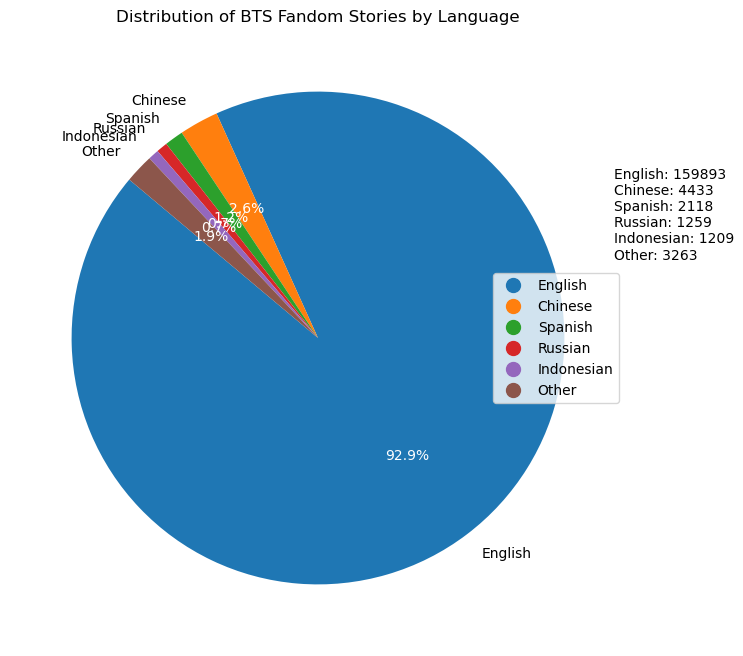

In [41]:
import matplotlib.pyplot as plt


languages = [
    "English", 
    "Chinese", 
    "Spanish", 
    "Russian", 
    "Indonesian", 
    "Other"
]

counts = [159893, 4433, 2118, 1259, 1209, 3263]  


plt.figure(figsize=(12, 8))


pie, texts, autotexts = plt.pie(counts, labels=languages, autopct='%1.1f%%', startangle=140)


colors = [plt.get_cmap('tab10').colors[i] for i in range(len(languages))]
patches = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(languages[i]))[0]  for i in range(len(languages))]
plt.legend(handles=patches, loc='center right', fontsize=10)


for text, autotext in zip(texts, autotexts):
    text.set_fontsize(10)
    autotext.set_fontsize(10)
    autotext.set_color('white')  


note = """
English: 159893
Chinese: 4433
Spanish: 2118
Russian: 1259
Indonesian: 1209
Other: 3263
"""


plt.text(1.2, 0.5, note, fontsize=10, verticalalignment="center")

plt.title('Distribution of BTS Fandom Stories by Language')

plt.show()


# “bts”famdom的kudos总数

In [6]:
from SPARQLWrapper import SPARQLWrapper, JSON

# Set SPARQL endpoint
sparql = SPARQLWrapper("http://194.171.203.17:8890/sparql")

# Set SPARQL query
sparql.setQuery("""
    PREFIX golem: <https://golemlab.eu/graph/>

    SELECT ?fandom (SUM(?numberOfKudos) AS ?totalKudos)
    WHERE {
      ?s golem:fandom ?fandom .
      ?s golem:numberOfKudos ?numberOfKudos .
      VALUES ?fandom { "Bangtan Boys" "BTS" }
    }
    GROUP BY ?fandom
""")

# Set return format to JSON
sparql.setReturnFormat(JSON)

# Execute SPARQL query and parse results
results = sparql.query().convert()

# Print results
print("Kudos Counts:")
for result in results["results"]["bindings"]:
    fandom = result["fandom"]["value"]
    kudos_count = result["totalKudos"]["value"]
    print(f"Fandom: {fandom}, Kudos Count: {kudos_count}")

Kudos Counts:
Fandom: Bangtan Boys, Kudos Count: 44223083
Fandom: BTS, Kudos Count: 44219020


# By filtering conditions, select the story IDs with 1k to 1 million words

In [7]:
from SPARQLWrapper import SPARQLWrapper, JSON


sparql = SPARQLWrapper("http://194.171.203.17:8890/sparql")


sparql.setQuery("""
    PREFIX golem: <https://golemlab.eu/graph/>
    SELECT ?story_id WHERE {
        ?s golem:fandom "BTS" ;
           golem:numberOfWords ?wordCount ;
           golem:story_id ?story_id .
        FILTER(xsd:integer(?wordCount) >= 1000 && xsd:integer(?wordCount) <= 1000000)
    }
    GROUP BY ?story_id
    ORDER BY DESC(?story_id)
""")



In [8]:
from SPARQLWrapper import SPARQLWrapper, JSON


sparql = SPARQLWrapper("http://194.171.203.17:8890/sparql")


sparql.setQuery("""
    PREFIX golem: <https://golemlab.eu/graph/>
    SELECT ?story_id WHERE {
        ?s golem:fandom "BTS" ;
           golem:numberOfWords ?wordCount ;
           golem:story_id ?story_id .
        FILTER(xsd:integer(?wordCount) >= 1000 && xsd:integer(?wordCount) <= 1000000)
    }
    GROUP BY ?story_id
    ORDER BY DESC(?story_id)
""")


sparql.setReturnFormat(JSON)


results = sparql.query().convert()


for result in results["results"]["bindings"]:
    print(result["story_id"]["value"])

41634414
41634366
41634042
41633925
41633904
41631786
41629845
41629245
41629170
41628804
41627649
41626551
41626446
41626266
41626200
41626101
41625546
41625417
41624520
41623653
41623629
41623206
41622123
41621151
41620419
41619735
41619594
41619456
41619420
41619381
41618673
41618517
41617776
41617368
41617284
41616519
41616411
41616126
41616117
41616033
41615238
41614617
41614569
41614368
41613924
41613825
41613693
41611737
41611215
41610693
41609343
41609334
41608368
41608155
41607912
41607150
41606730
41606046
41605938
41605836
41605743
41605569
41605503
41605275
41605044
41604939
41604750
41603922
41603463
41603391
41603007
41602803
41602608
41602077
41601705
41600916
41600697
41599926
41599890
41599374
41599101
41596965
41596656
41596269
41595864
41595564
41595474
41595414
41594853
41594775
41593755
41592411
41592198
41590707
41590404
41588931
41588568
41587950
41587914
41587584
41586987
41586804
41586798
41585541
41585124
41584119
41584083
41583441
41583348
41583240
41583183
4

In [9]:

num_ids = len(results["results"]["bindings"])
print("Number of IDs:", num_ids)

Number of IDs: 35000


In [10]:
# Get the story IDs that meet the conditions and their corresponding languages

In [42]:
# Set up the query statement
sparql.setQuery("""
    PREFIX golem: <https://golemlab.eu/graph/>
    SELECT ?story_id ?language WHERE {
        ?s golem:fandom "BTS" ;
           golem:numberOfWords ?wordCount ;
           golem:story_id ?story_id ;
           golem:language ?language .
        FILTER(xsd:integer(?wordCount) >= 1000 && xsd:integer(?wordCount) <= 1000000)
    }
    ORDER BY DESC(?story_id)
""")

# Set the return format to JSON
sparql.setReturnFormat(JSON)

# Execute the query and get the results
results = sparql.query().convert()

# Create a dictionary to store story IDs corresponding to each language
language_to_story_ids = {}

# Iterate through the results and fill the dictionary
for result in results["results"]["bindings"]:
    language = result["language"]["value"]
    story_id = result["story_id"]["value"]
    if language not in language_to_story_ids:
        language_to_story_ids[language] = []
    language_to_story_ids[language].append(story_id)

# Output the count and corresponding story IDs for each language
for language, story_ids in language_to_story_ids.items():
    print(f"Language: {language}, Count: {len(story_ids)}, Story IDs: {story_ids}")


Language: English, Count: 31297, Story IDs: ['41634414', '41634366', '41634042', '41633925', '41633904', '41631786', '41629845', '41629245', '41629170', '41628804', '41627649', '41626266', '41626101', '41625546', '41625417', '41624520', '41623653', '41623629', '41623206', '41622123', '41621151', '41620419', '41619735', '41619456', '41619420', '41619381', '41618673', '41618517', '41617776', '41617368', '41617284', '41616519', '41616411', '41616126', '41616117', '41616033', '41615238', '41614617', '41614569', '41614368', '41613924', '41613825', '41611737', '41611215', '41610693', '41609343', '41609334', '41608368', '41608155', '41607150', '41606730', '41606046', '41605938', '41605836', '41605743', '41605569', '41605503', '41605275', '41605044', '41604939', '41604750', '41603922', '41603463', '41603391', '41603007', '41602803', '41602608', '41602077', '41601705', '41600916', '41600697', '41599926', '41599890', '41599374', '41599101', '41596269', '41595864', '41595564', '41595414', '415948

In [12]:
# Get the number of each language and sort
sorted_languages = sorted(language_to_story_ids.items(), key=lambda item: len(item[1]), reverse=True)

# Get the top 5 data
top_5_languages = sorted_languages[:5]

# output
for language, story_ids in top_5_languages:
    print(f"Language: {language}, Count: {len(story_ids)}, Story IDs: {story_ids}")

Language: English, Count: 31297, Story IDs: ['41634414', '41634366', '41634042', '41633925', '41633904', '41631786', '41629845', '41629245', '41629170', '41628804', '41627649', '41626266', '41626101', '41625546', '41625417', '41624520', '41623653', '41623629', '41623206', '41622123', '41621151', '41620419', '41619735', '41619456', '41619420', '41619381', '41618673', '41618517', '41617776', '41617368', '41617284', '41616519', '41616411', '41616126', '41616117', '41616033', '41615238', '41614617', '41614569', '41614368', '41613924', '41613825', '41611737', '41611215', '41610693', '41609343', '41609334', '41608368', '41608155', '41607150', '41606730', '41606046', '41605938', '41605836', '41605743', '41605569', '41605503', '41605275', '41605044', '41604939', '41604750', '41603922', '41603463', '41603391', '41603007', '41602803', '41602608', '41602077', '41601705', '41600916', '41600697', '41599926', '41599890', '41599374', '41599101', '41596269', '41595864', '41595564', '41595414', '415948

# 将其用dataframe展示

In [44]:
import pandas as pd

# Creat a dictionary
language_to_story_ids = {}


for result in results["results"]["bindings"]:
    language = result["language"]["value"]
    story_id = result["story_id"]["value"]
    if language not in language_to_story_ids:
        language_to_story_ids[language] = []
    language_to_story_ids[language].append(story_id)


df = pd.DataFrame(columns=["Language", "Count", "Story IDs"])

sorted_languages = sorted(language_to_story_ids.items(), key=lambda item: len(item[1]), reverse=True)


top_5_languages = sorted_languages[:5]


for language, story_ids in top_5_languages:
    df = df.append({"Language": language, "Count": len(story_ids), "Story IDs": ", ".join(story_ids)}, ignore_index=True)


print(df)


               Language  Count  \
0               English  31297   
1             中文-普通话 國語   1380   
2               Español    713   
3  Português brasileiro    410   
4      Bahasa Indonesia    371   

                                           Story IDs  
0  41634414, 41634366, 41634042, 41633925, 416339...  
1  41613693, 41595474, 41592198, 41577105, 415762...  
2  41607912, 41583240, 41580408, 41571213, 415708...  
3  41626551, 41626446, 41626200, 41596965, 415868...  
4  41619594, 41533995, 41315733, 41228673, 412029...  


/var/folders/63/2d9ykqt55dsbkkn2qxh5j76h0000gn/T/ipykernel_1496/3501867029.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Language": language, "Count": len(story_ids), "Story IDs": ", ".join(story_ids)}, ignore_index=True)
/var/folders/63/2d9ykqt55dsbkkn2qxh5j76h0000gn/T/ipykernel_1496/3501867029.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Language": language, "Count": len(story_ids), "Story IDs": ", ".join(story_ids)}, ignore_index=True)
/var/folders/63/2d9ykqt55dsbkkn2qxh5j76h0000gn/T/ipykernel_1496/3501867029.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Language": language, "Count": len(story_ids), "Story IDs": ", ".join(story_ids)}, ignore_index=T

In [ ]:
#Present the outcome

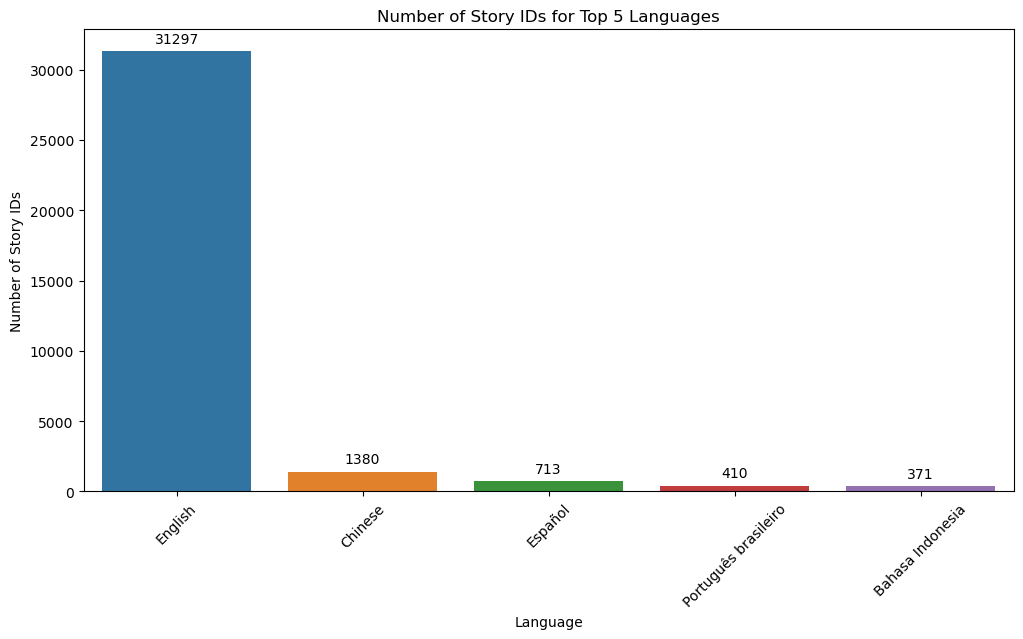

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    "Language": ["English", "Chinese", "Español", "Português brasileiro", "Bahasa Indonesia"],
    "Count": [31297, 1380, 713, 410, 371]
}


df = pd.DataFrame(data)


plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=df, x='Language', y='Count', order=df['Language'])
plt.title('Number of Story IDs for Top 5 Languages')
plt.xlabel('Language')
plt.ylabel('Number of Story IDs')
plt.xticks(rotation=45)


for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


In [45]:
#Randomly extract 371 English storyids

In [45]:
import random

language_to_story_ids = {}


for result in results["results"]["bindings"]:
    language = result["language"]["value"]
    story_id = result["story_id"]["value"]
    if language not in language_to_story_ids:
        language_to_story_ids[language] = []
    language_to_story_ids[language].append(story_id)


english_story_ids = language_to_story_ids.get("English", [])


random_english_story_ids = random.sample(english_story_ids, k=371)


print(random_english_story_ids)


['37286296', '41497581', '35752822', '36890497', '30519066', '36571048', '39528084', '39786270', '30257397', '35682994', '37742191', '30159342', '30438219', '30131733', '29982732', '34861705', '32423920', '41577363', '40924083', '30947669', '35915569', '32144302', '31315931', '41452335', '35454676', '33225829', '36694450', '37611271', '34402924', '34580866', '38433874', '36980257', '38595723', '35952319', '34446478', '33951775', '30470451', '37612555', '41350131', '37383658', '37735309', '31574594', '34957174', '32188162', '33639652', '36027454', '30359331', '31091960', '40899186', '36875536', '34076416', '38111710', '30456480', '33130231', '32878831', '36434128', '32045317', '36985804', '35008081', '37254796', '31824559', '36069223', '39594549', '32331565', '39368130', '32798284', '35779636', '30920057', '40215312', '31732306', '30492462', '39132048', '39032718', '30780419', '36629548', '33078832', '36456607', '32370919', '37213564', '40397685', '38495782', '36984901', '35544802', '39

In [46]:
#Randomly extract 371 Chinese storyids

In [47]:
chinese_story_ids = language_to_story_ids.get("中文-普通话 國語", [])


random_chinese_story_ids = random.sample(chinese_story_ids, k=371)


print(random_chinese_story_ids)

['31150691', '37764493', '32623813', '32597161', '37323880', '38160949', '38132305', '41138607', '41576277', '38182816', '36719992', '39516801', '30899477', '30867788', '39846951', '37723696', '38182750', '31881586', '37511872', '31709848', '33700735', '32046958', '39871584', '30210057', '31959097', '37953391', '37379971', '33719293', '37504237', '41172735', '40971702', '38182834', '38160886', '31523273', '40411137', '34666321', '40841601', '38581077', '41172765', '39813000', '33836746', '41116581', '36799582', '39296049', '30897368', '30218103', '38228146', '33859348', '40220679', '32487712', '37189402', '37111255', '31647023', '37395916', '30374265', '40797636', '39514335', '35802544', '32061133', '36525670', '34819051', '39830313', '30890924', '31795891', '34545892', '30039501', '39122373', '41116680', '35784700', '41259447', '30021843', '40187409', '30330333', '30118020', '40412658', '38139715', '36525643', '40791180', '30798557', '39375195', '40842528', '34340926', '37379485', '38

In [48]:
#Randomly extract 371 Español storyids

In [49]:

spain_story_ids = language_to_story_ids.get("Español", [])


random_spain_story_ids = random.sample(spain_story_ids, k=371)


print(random_spain_story_ids)

['31096346', '37406254', '36023527', '33083623', '30150045', '40418334', '35191771', '35714437', '39712209', '35963389', '35042740', '36505297', '31138568', '37397737', '32710840', '33771052', '38788845', '30008583', '31960264', '35206126', '30909572', '31812532', '39826761', '38672475', '40128381', '33686554', '31107386', '37495945', '36561028', '36790954', '30517464', '33764698', '33588754', '32543011', '37742731', '34961761', '30808523', '31513340', '35038876', '36038977', '33186598', '38475034', '30212739', '41200287', '39370617', '30245661', '35608051', '33418642', '32631145', '38475859', '40825971', '33421228', '39019845', '35525137', '40358835', '30955265', '32949094', '34920493', '38398774', '31225472', '33772927', '34198594', '40181799', '37152793', '30308769', '41537040', '38300791', '39422169', '33733561', '32908408', '41583240', '40716321', '41198952', '40462191', '39783810', '34729492', '33612445', '40109853', '39756732', '40509234', '35447500', '32710840', '40196238', '36

In [50]:
#Randomly extract 371 Português brasileiro storyids

In [51]:

Português_brasileiro_story_ids = language_to_story_ids.get("Português brasileiro", [])


random_Português_brasileiro_story_ids = random.sample(Português_brasileiro_story_ids, k=371)


print(random_Português_brasileiro_story_ids)


['37744408', '32331553', '33724336', '31660082', '41544918', '35692393', '38753379', '33866338', '33340426', '32475397', '34492102', '39564852', '40286454', '34605844', '31034024', '34303675', '35568256', '33662368', '40333128', '37462366', '34845544', '40174770', '33121270', '35431003', '36705622', '36486982', '34634779', '30677249', '35217409', '36636553', '35313094', '33563878', '33643819', '40813770', '35686873', '34806901', '33076159', '40817061', '34414828', '39058602', '35484700', '33201943', '34281790', '33518947', '30843659', '35178874', '37547530', '37859209', '35742901', '40663635', '40780137', '35279908', '35855785', '33786715', '40143591', '32925088', '30086139', '30396444', '34832284', '40570368', '33295858', '36998194', '37377235', '30143217', '35391892', '38896731', '32456839', '36548335', '36252130', '38195839', '34930621', '39885057', '33378250', '33637513', '35922898', '33901840', '33765637', '36337060', '39093741', '35327803', '38441872', '40902222', '30173310', '30

In [66]:
import pandas as pd


random_chinese_story_ids = pd.DataFrame(random_chinese_story_ids, columns=["Story IDs"])
Bahasa_Indonesia_story_ids = pd.DataFrame(Bahasa_Indonesia_story_ids, columns=["Story IDs"])
random_Português_brasileiro_story_ids = pd.DataFrame(random_Português_brasileiro_story_ids, columns=["Story IDs"])
random_spain_story_ids = pd.DataFrame(random_spain_story_ids, columns=["Story IDs"])
random_english_story_ids = pd.DataFrame(random_english_story_ids, columns=["Story IDs"])


random_chinese_story_ids["Language"] = "Chinese"
Bahasa_Indonesia_story_ids["Language"] = "Bahasa Indonesia"
random_Português_brasileiro_story_ids["Language"] = "Português brasileiro"
random_spain_story_ids["Language"] = "Spanish"
random_english_story_ids["Language"] = "English"


print("Random Chinese Story IDs:")
print(random_chinese_story_ids.head(2))

print("\nBahasa Indonesia Story IDs:")
print(Bahasa_Indonesia_story_ids.head(2))

print("\nRandom Portuguese brasileiro Story IDs:")
print(random_Português_brasileiro_story_ids.head(2))

print("\nRandom Spanish Story IDs:")
print(random_spain_story_ids.head(2))

print("\nRandom English Story IDs:")
print(random_english_story_ids.head(2))


all_data = pd.concat([random_chinese_story_ids, Bahasa_Indonesia_story_ids, 
                      random_Português_brasileiro_story_ids, random_spain_story_ids, 
                      random_english_story_ids])


total_rows = len(all_data)

print("Total number of data: ", total_rows)


Random Chinese Story IDs:
  Story IDs Language
0  31150691  Chinese
1  37764493  Chinese

Bahasa Indonesia Story IDs:
  Story IDs          Language
0  41619594  Bahasa Indonesia
1  41533995  Bahasa Indonesia

Random Portuguese brasileiro Story IDs:
  Story IDs              Language
0  37744408  Português brasileiro
1  32331553  Português brasileiro

Random Spanish Story IDs:
  Story IDs Language
0  31096346  Spanish
1  37406254  Spanish

Random English Story IDs:
  Story IDs Language
0  37286296  English
1  41497581  English
Total number of data:  1855


# Generate kudos links in various languages ​​and crawl kudos

## english

In [54]:
def generate_kudos_link(story_id):
    return f"https://archiveofourown.org/works/{story_id}?view_full_work=true#kudos"

def ids_to_kudos_links(ids):
    kudos_links = []
    for story_id in ids:
        kudos_link = generate_kudos_link(story_id)
        kudos_links.append(kudos_link)  # Add the generated link to the list
    return kudos_links


def print_kudos_links(kudos_links):
    print("Kudos Links:")
    for link in kudos_links:
        print(link)
        
english_ids = random_english_story_ids

# Generate and print kudos links
english_kudos_links = ids_to_kudos_links(english_ids)
print_kudos_links(english_kudos_links)  # Print the generated links

Kudos Links:
https://archiveofourown.org/works/30141783?view_full_work=true#kudos
https://archiveofourown.org/works/39739578?view_full_work=true#kudos
https://archiveofourown.org/works/39032718?view_full_work=true#kudos
https://archiveofourown.org/works/36629548?view_full_work=true#kudos
https://archiveofourown.org/works/35198758?view_full_work=true#kudos
https://archiveofourown.org/works/34687726?view_full_work=true#kudos
https://archiveofourown.org/works/37141735?view_full_work=true#kudos
https://archiveofourown.org/works/38200462?view_full_work=true#kudos
https://archiveofourown.org/works/33738400?view_full_work=true#kudos
https://archiveofourown.org/works/31556537?view_full_work=true#kudos
https://archiveofourown.org/works/34320424?view_full_work=true#kudos
https://archiveofourown.org/works/37422487?view_full_work=true#kudos
https://archiveofourown.org/works/30918503?view_full_work=true#kudos
https://archiveofourown.org/works/39155979?view_full_work=true#kudos
https://archiveofouro

In [ ]:
#Keep kudos link in csv doc

In [55]:
import pandas as pd


def save_links_to_csv(links, filename):
    df = pd.DataFrame({'kudos_links': links})
    df.to_csv(filename, index=False)
    print(f"Kudos links 已保存到 {filename}")


save_links_to_csv(english_kudos_links, 'english_kudos_links.csv')


Kudos links 已保存到 english_kudos_links.csv


In [78]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

def login(driver, username, password):
    driver.get("https://archiveofourown.org/")  # Replace with the actual website URL
    
    try:
        # Click the login dropdown
        login_dropdown = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'login-dropdown')))
        login_dropdown.click()
        
        # Enter username
        username_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'user_session_login_small')))
        username_field.send_keys(username)
        
        # Enter password
        password_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'user_session_password_small')))
        password_field.send_keys(password)
        
        # Click login button
        login_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.NAME, 'commit')))
        login_button.click()
        
        print("Logged in successfully")
    except Exception as e:
        print("Error during login:", e)
        driver.quit()

def get_work_id_from_kudos_link(english_kudos_link):
    story_id = english_kudos_link.split("/works/")[1].split("?")[0]
    return story_id

def get_kudos_usernames(driver, url):
    try:
        driver.get(url)
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'work')))
        
        time.sleep(1)
        
        # Check if there is an adult content warning
        adult_content_link = driver.find_elements(By.XPATH, '//a[text()="Yes, Continue"]')
        if adult_content_link:
            adult_content_link[0].click()
            # Wait for the page to load after clicking "Yes, Continue"
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'work')))
        
        click_count = 0
        timeout_count = 0  # Counter for consecutive timeouts
        driver.refresh()
        while True:
            try:
                kudos_more_link = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'a#kudos_more_link')))
                kudos_more_link.click()
                click_count += 1
                print(f"Clicked {click_count} times")
                # Reset timeout count on successful click
                timeout_count = 0
                # Wait for the new data to load
                time.sleep(1)  # Add a delay to ensure new data is loaded (not recommended, but sometimes necessary)
                WebDriverWait(driver, 10).until(EC.staleness_of(kudos_more_link))
            except TimeoutException:
                timeout_count += 1
                print("Timeout: Unable to find kudos more link")
                if timeout_count >= 1:
                    print("Reached maximum consecutive timeouts. Now trying to get usernames from page.")
                    break
            except Exception as e:
                print("Error:", e)
                break
        new_html = driver.page_source
        soup = BeautifulSoup(new_html, 'html.parser')
        kudos_div = soup.find(id='kudos')
        if kudos_div:
            usernames = [a['href'].split('/')[-1] for a in kudos_div.find_all('a')]
            return usernames
        else:
            print("Kudos div not found.")
            return None
    except Exception as e:
        print(f"Error while processing {url}: {e}")
        return None
    
# 提取 story_id 的函数
def extract_story_id(url):
    match = re.search(r"/works/(\d+)", url)
    if match:
        return match.group(1)
    else:
        return None

# Login
username = "BBai"
password = "Bd13829255112"

# Create a Chrome WebDriver instance
driver = webdriver.Chrome()

# Login
login(driver, username, password)

time.sleep(3)

# Initialize an empty dictionary to store work_id and corresponding usernames
english_story_id_usernames = {}


# 从 CSV 文件中加载数据
df = pd.read_csv('english_kudos_links.csv')

# 提取链接列
english_kudos_links = df['kudos_links']

# Open each link and get usernames
for english_kudos_link in english_kudos_links:
    try:
        english_usernames = get_kudos_usernames(driver, english_kudos_link)
        english_story_id = get_work_id_from_kudos_link(english_kudos_link)
        print("-----> Finished getting kudos for " + english_kudos_link)
        if english_usernames:
            english_story_id_usernames[english_story_id] = english_usernames
    except Exception as e:
        print(f"Skipping {english_kudos_link} due to error: {e}")

# Print the result
for story_id, usernames in english_story_id_usernames.items():
    print(f"Work ID: {story_id}, Usernames: {usernames}")


Logged in successfully
Clicked 1 times
Clicked 2 times
Clicked 3 times
Timeout: Unable to find kudos more link
Reached maximum consecutive timeouts. Now trying to get usernames from page.
-----> Finished getting kudos for https://archiveofourown.org/works/41493156?view_full_work=true#kudos
Error while processing https://archiveofourown.org/works/31163105?view_full_work=true#kudos: Message: 
Stacktrace:
0   chromedriver                        0x00000001008be510 chromedriver + 4302096
1   chromedriver                        0x00000001008b6e58 chromedriver + 4271704
2   chromedriver                        0x00000001004e819c chromedriver + 278940
3   chromedriver                        0x000000010052a2c4 chromedriver + 549572
4   chromedriver                        0x0000000100562c5c chromedriver + 781404
5   chromedriver                        0x000000010051f004 chromedriver + 503812
6   chromedriver                        0x000000010051f9ec chromedriver + 506348
7   chromedriver         

In [79]:
import pandas as pd
english_df_7 = pd.DataFrame(list(english_story_id_usernames.items()), columns=['work_id', 'username'])
english_df_7

,work_id,username
0,41493156,"[Acana, floralxtears, Plain_oatmeal, Silent_Ni..."
1,39435243,"[WangXianLuv1013, LineaBlack, PantherPard, Fay..."
2,33626635,"[Yooniepie_93, wolfgirl199914, WatermelonFlavo..."
3,41048751,"[LL_TTK, Sommer_500, xear, Yoongi_baby97, hw2n..."
4,40053582,"[sumipink, Bella_lott, Min0394, Hometoacactus,..."
...,...,...
143,37423978,"[IndigoBookwyrm, hoggy, silver_8, hobihobiluv,..."
144,33537346,"[Sereiadior, Harasiam, Chinthyam, ciaodejun, P..."
145,30326253,"[vminieyoonminikm13, Mari_kookieminie, DearNoO..."
146,32688874,"[mygslatte, Misienko, BPDprince, Chelsea_Sen, ..."


In [ ]:
#save the file

In [80]:
import pandas as pd


csv_filename = 'english_df_7_data.csv'


english_df_7.to_csv(csv_filename, index=False)

print(f"DataFrame 已保存到 {csv_filename}")

DataFrame 已保存到 english_df_7_data.csv


# Chinese

In [82]:
def generate_kudos_link(story_id):
    return f"https://archiveofourown.org/works/{story_id}?view_full_work=true#kudos"

def ids_to_kudos_links(ids):
    kudos_links = []
    for story_id in ids:
        kudos_link = generate_kudos_link(story_id)
        kudos_links.append(kudos_link)  # Add the generated link to the list
    return kudos_links


def print_kudos_links(kudos_links):
    print("Kudos Links:")
    for link in kudos_links:
        print(link)
        
chinese_ids = random_chinese_story_ids

# Generate and print kudos links
chinese_kudos_links = ids_to_kudos_links(chinese_ids)
print_kudos_links(chinese_kudos_links)  # Print the generated links

Kudos Links:
https://archiveofourown.org/works/38962581?view_full_work=true#kudos
https://archiveofourown.org/works/33389767?view_full_work=true#kudos
https://archiveofourown.org/works/36048811?view_full_work=true#kudos
https://archiveofourown.org/works/40366695?view_full_work=true#kudos
https://archiveofourown.org/works/41576130?view_full_work=true#kudos
https://archiveofourown.org/works/40169547?view_full_work=true#kudos
https://archiveofourown.org/works/38182861?view_full_work=true#kudos
https://archiveofourown.org/works/34250395?view_full_work=true#kudos
https://archiveofourown.org/works/33389596?view_full_work=true#kudos
https://archiveofourown.org/works/30311211?view_full_work=true#kudos
https://archiveofourown.org/works/37533703?view_full_work=true#kudos
https://archiveofourown.org/works/34904554?view_full_work=true#kudos
https://archiveofourown.org/works/30017397?view_full_work=true#kudos
https://archiveofourown.org/works/41462991?view_full_work=true#kudos
https://archiveofouro

In [83]:
import pandas as pd

# 定义一个函数，将数据保存到 CSV 文件中
def save_links_to_csv(links, filename):
    df = pd.DataFrame({'kudos_links': links})
    df.to_csv(filename, index=False)
    print(f"Kudos links 已保存到 {filename}")

# 使用定义的函数保存 kudos links 到 CSV 文件
save_links_to_csv(chinese_kudos_links, 'chinese_kudos_links.csv')

Kudos links 已保存到 chinese_kudos_links.csv


In [90]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

def login(driver, username, password):
    driver.get("https://archiveofourown.org/")  # Replace with the actual website URL
    
    try:
        # Click the login dropdown
        login_dropdown = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'login-dropdown')))
        login_dropdown.click()
        
        # Enter username
        username_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'user_session_login_small')))
        username_field.send_keys(username)
        
        # Enter password
        password_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'user_session_password_small')))
        password_field.send_keys(password)
        
        # Click login button
        login_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.NAME, 'commit')))
        login_button.click()
        
        print("Logged in successfully")
    except Exception as e:
        print("Error during login:", e)
        driver.quit()

def get_work_id_from_kudos_link(chinese_kudos_link):
    story_id = chinese_kudos_link.split("/works/")[1].split("?")[0]
    return story_id

def get_kudos_usernames(driver, url):
    try:
        driver.get(url)
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'work')))
        
        time.sleep(1)
        
        # Check if there is an adult content warning
        adult_content_link = driver.find_elements(By.XPATH, '//a[text()="Yes, Continue"]')
        if adult_content_link:
            adult_content_link[0].click()
            # Wait for the page to load after clicking "Yes, Continue"
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'work')))
        
        click_count = 0
        timeout_count = 0  # Counter for consecutive timeouts
        driver.refresh()
        while True:
            try:
                kudos_more_link = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'a#kudos_more_link')))
                kudos_more_link.click()
                click_count += 1
                print(f"Clicked {click_count} times")
                # Reset timeout count on successful click
                timeout_count = 0
                # Wait for the new data to load
                time.sleep(1)  # Add a delay to ensure new data is loaded (not recommended, but sometimes necessary)
                WebDriverWait(driver, 10).until(EC.staleness_of(kudos_more_link))
            except TimeoutException:
                timeout_count += 1
                print("Timeout: Unable to find kudos more link")
                if timeout_count >= 1:
                    print("Reached maximum consecutive timeouts. Now trying to get usernames from page.")
                    break
            except Exception as e:
                print("Error:", e)
                break
        new_html = driver.page_source
        soup = BeautifulSoup(new_html, 'html.parser')
        kudos_div = soup.find(id='kudos')
        if kudos_div:
            usernames = [a['href'].split('/')[-1] for a in kudos_div.find_all('a')]
            return usernames
        else:
            print("Kudos div not found.")
            return None
    except Exception as e:
        print(f"Error while processing {url}: {e}")
        return None
    
# 提取 story_id 的函数
def extract_story_id(url):
    match = re.search(r"/works/(\d+)", url)
    if match:
        return match.group(1)
    else:
        return None

# Login
username = "BBai"
password = "Bd13829255112"

# Create a Chrome WebDriver instance
driver = webdriver.Chrome()

# Login
login(driver, username, password)

time.sleep(3)

# Initialize an empty dictionary to store work_id and corresponding usernames
chinese_story_id_usernames = {}


# 从 CSV 文件中加载数据
df = pd.read_csv('chinese_kudos_links.csv')

# 提取链接列
chinese_kudos_links = df['kudos_links']

# Open each link and get usernames
for chinese_kudos_link in chinese_kudos_links:
    try:
        chinese_usernames = get_kudos_usernames(driver, chinese_kudos_link)
        chinese_story_id = get_work_id_from_kudos_link(chinese_kudos_link)
        print("-----> Finished getting kudos for " + chinese_kudos_link)
        if chinese_usernames:
            chinese_story_id_usernames[chinese_story_id] = chinese_usernames
    except Exception as e:
        print(f"Skipping {chinese_kudos_link} due to error: {e}")

# Print the result
for story_id, usernames in chinese_story_id_usernames.items():
    print(f"Work ID: {story_id}, Usernames: {usernames}")


Logged in successfully
Timeout: Unable to find kudos more link
Reached maximum consecutive timeouts. Now trying to get usernames from page.
-----> Finished getting kudos for https://archiveofourown.org/works/40244955?view_full_work=true#kudos
Timeout: Unable to find kudos more link
Reached maximum consecutive timeouts. Now trying to get usernames from page.
-----> Finished getting kudos for https://archiveofourown.org/works/38824329?view_full_work=true#kudos
Error while processing https://archiveofourown.org/works/40971702?view_full_work=true#kudos: Message: 
Stacktrace:
0   chromedriver                        0x0000000102586510 chromedriver + 4302096
1   chromedriver                        0x000000010257ee58 chromedriver + 4271704
2   chromedriver                        0x00000001021b019c chromedriver + 278940
3   chromedriver                        0x00000001021f22c4 chromedriver + 549572
4   chromedriver                        0x000000010222ac5c chromedriver + 781404
5   chromedrive

In [94]:
import pandas as pd
chinese_df_3 = pd.DataFrame(list(chinese_story_id_usernames.items()), columns=['work_id', 'username'])
chinese_df_3

,work_id,username
0,40244955,"[xiaowwai, kwonorange, EM_WX, mintchocolatemin..."
1,38824329,"[zt_91, peppermint11, Cerise61, AstraeusV, Jui..."
2,38825082,"[irisslady, lek1348, jk00kks, Meme_7, XunxiHsi..."
3,39849480,"[Yiyi070925, SALTseason, tangluoyu, seagull_ko..."
4,33450490,"[YourFavoriteFanGirl, 3am_y0369]"
...,...,...
273,32129023,"[misamisa_V, venishiver, wertyuiz23, poiui, SC..."
274,40577877,"[Icy1030, Lumi0309]"
275,30899477,"[mm_2680, Eggtae, tetesbread]"
276,41573610,"[mitona, A001154]"


# spain

In [107]:
def generate_kudos_link(story_id):
    return f"https://archiveofourown.org/works/{story_id}?view_full_work=true#kudos"

def ids_to_kudos_links(ids):
    kudos_links = []
    for story_id in ids:
        kudos_link = generate_kudos_link(story_id)
        kudos_links.append(kudos_link)  # Add the generated link to the list
    return kudos_links


def print_kudos_links(kudos_links):
    print("Kudos Links:")
    for link in kudos_links:
        print(link)
        
spain_ids = random_spain_story_ids

# Generate and print kudos links
spain_kudos_links = ids_to_kudos_links(spain_ids)
print_kudos_links(spain_kudos_links)  # Print the generated links

Kudos Links:
https://archiveofourown.org/works/38475859?view_full_work=true#kudos
https://archiveofourown.org/works/31028999?view_full_work=true#kudos
https://archiveofourown.org/works/34961761?view_full_work=true#kudos
https://archiveofourown.org/works/31831492?view_full_work=true#kudos
https://archiveofourown.org/works/32690074?view_full_work=true#kudos
https://archiveofourown.org/works/36861028?view_full_work=true#kudos
https://archiveofourown.org/works/34854994?view_full_work=true#kudos
https://archiveofourown.org/works/41256174?view_full_work=true#kudos
https://archiveofourown.org/works/34914295?view_full_work=true#kudos
https://archiveofourown.org/works/34937431?view_full_work=true#kudos
https://archiveofourown.org/works/38135368?view_full_work=true#kudos
https://archiveofourown.org/works/33328744?view_full_work=true#kudos
https://archiveofourown.org/works/29999820?view_full_work=true#kudos
https://archiveofourown.org/works/40363749?view_full_work=true#kudos
https://archiveofouro

In [108]:
import pandas as pd

# 定义一个函数，将数据保存到 CSV 文件中
def save_links_to_csv(links, filename):
    df = pd.DataFrame({'kudos_links': links})
    df.to_csv(filename, index=False)
    print(f"Kudos links 已保存到 {filename}")

# 使用定义的函数保存 kudos links 到 CSV 文件
save_links_to_csv(spain_kudos_links, 'spain_kudos_links.csv')

Kudos links 已保存到 spain_kudos_links.csv


In [109]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

def login(driver, username, password):
    driver.get("https://archiveofourown.org/")  # Replace with the actual website URL
    
    try:
        # Click the login dropdown
        login_dropdown = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'login-dropdown')))
        login_dropdown.click()
        
        # Enter username
        username_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'user_session_login_small')))
        username_field.send_keys(username)
        
        # Enter password
        password_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'user_session_password_small')))
        password_field.send_keys(password)
        
        # Click login button
        login_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.NAME, 'commit')))
        login_button.click()
        
        print("Logged in successfully")
    except Exception as e:
        print("Error during login:", e)
        driver.quit()

def get_work_id_from_kudos_link(spain_kudos_link):
    story_id = spain_kudos_link.split("/works/")[1].split("?")[0]
    return story_id

def get_kudos_usernames(driver, url):
    try:
        driver.get(url)
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'work')))
        
        time.sleep(1)
        
        # Check if there is an adult content warning
        adult_content_link = driver.find_elements(By.XPATH, '//a[text()="Yes, Continue"]')
        if adult_content_link:
            adult_content_link[0].click()
            # Wait for the page to load after clicking "Yes, Continue"
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'work')))
        
        click_count = 0
        timeout_count = 0  # Counter for consecutive timeouts
        driver.refresh()
        while True:
            try:
                kudos_more_link = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'a#kudos_more_link')))
                kudos_more_link.click()
                click_count += 1
                print(f"Clicked {click_count} times")
                # Reset timeout count on successful click
                timeout_count = 0
                # Wait for the new data to load
                time.sleep(1)  # Add a delay to ensure new data is loaded (not recommended, but sometimes necessary)
                WebDriverWait(driver, 10).until(EC.staleness_of(kudos_more_link))
            except TimeoutException:
                timeout_count += 1
                print("Timeout: Unable to find kudos more link")
                if timeout_count >= 1:
                    print("Reached maximum consecutive timeouts. Now trying to get usernames from page.")
                    break
            except Exception as e:
                print("Error:", e)
                break
        new_html = driver.page_source
        soup = BeautifulSoup(new_html, 'html.parser')
        kudos_div = soup.find(id='kudos')
        if kudos_div:
            usernames = [a['href'].split('/')[-1] for a in kudos_div.find_all('a')]
            return usernames
        else:
            print("Kudos div not found.")
            return None
    except Exception as e:
        print(f"Error while processing {url}: {e}")
        return None
    
# 提取 story_id 的函数
def extract_story_id(url):
    match = re.search(r"/works/(\d+)", url)
    if match:
        return match.group(1)
    else:
        return None

# Login
username = "BBai"
password = "Bd13829255112"

# Create a Chrome WebDriver instance
driver = webdriver.Chrome()

# Login
login(driver, username, password)

time.sleep(3)

# Initialize an empty dictionary to store work_id and corresponding usernames
spain_story_id_usernames = {}


# 从 CSV 文件中加载数据
df = pd.read_csv('spain_kudos_links.csv')

# 提取链接列
spain_kudos_links = df['kudos_links']

# Open each link and get usernames
for spain_kudos_link in spain_kudos_links:
    try:
        spain_usernames = get_kudos_usernames(driver, spain_kudos_link)
        spain_story_id = get_work_id_from_kudos_link(spain_kudos_link)
        print("-----> Finished getting kudos for " + spain_kudos_link)
        if spain_usernames:
            spain_story_id_usernames[spain_story_id] = spain_usernames
    except Exception as e:
        print(f"Skipping {spain_kudos_link} due to error: {e}")

# Print the result
for story_id, usernames in spain_story_id_usernames.items():
    print(f"Work ID: {story_id}, Usernames: {usernames}")


Logged in successfully
Timeout: Unable to find kudos more link
Reached maximum consecutive timeouts. Now trying to get usernames from page.
-----> Finished getting kudos for https://archiveofourown.org/works/38475859?view_full_work=true#kudos
Timeout: Unable to find kudos more link
Reached maximum consecutive timeouts. Now trying to get usernames from page.
-----> Finished getting kudos for https://archiveofourown.org/works/31028999?view_full_work=true#kudos
Timeout: Unable to find kudos more link
Reached maximum consecutive timeouts. Now trying to get usernames from page.
-----> Finished getting kudos for https://archiveofourown.org/works/34961761?view_full_work=true#kudos
Timeout: Unable to find kudos more link
Reached maximum consecutive timeouts. Now trying to get usernames from page.
-----> Finished getting kudos for https://archiveofourown.org/works/31831492?view_full_work=true#kudos
Timeout: Unable to find kudos more link
Reached maximum consecutive timeouts. Now trying to get u

In [110]:
import pandas as pd
spain_df_1 = pd.DataFrame(list(spain_story_id_usernames.items()), columns=['work_id', 'username'])
spain_df_1

,work_id,username
0,38475859,"[Pentelho3, Dakaria_Scar05, sopemoon, l3ilaaar..."
1,31028999,"[Sagy00, Ada_myg, tomomi20, lorena_z_ruiz, aut..."
2,34961761,"[IamLia, Chueok_seon]"
3,31831492,"[angelbabypjm, thisiskartrying, Patricia1310, ..."
4,32690074,"[Cafuki_01, Chicken_4, Desierto7, Zukun, Arcoi..."
...,...,...
267,33783103,"[pau_gpa, Idolina_fangurl]"
268,41059749,[Diamarafani]
269,32710840,"[nix0l98, K95, astronomydomine, RockyPocky, Th..."
270,36790954,"[lifebymoon, sunflowers_fg, moonmpz, kodzuyoon..."


In [111]:
import pandas as pd


# 设置文件名
csv_filename = 'spain_df_1_data.csv'

# 保存 DataFrame 到 CSV 文件
spain_df_1.to_csv(csv_filename, index=False)

print(f"DataFrame 已保存到 {csv_filename}")

DataFrame 已保存到 spain_df_1_data.csv


# Português brasileiro

In [112]:
def generate_kudos_link(story_id):
    return f"https://archiveofourown.org/works/{story_id}?view_full_work=true#kudos"

def ids_to_kudos_links(ids):
    kudos_links = []
    for story_id in ids:
        kudos_link = generate_kudos_link(story_id)
        kudos_links.append(kudos_link)  # Add the generated link to the list
    return kudos_links


def print_kudos_links(kudos_links):
    print("Kudos Links:")
    for link in kudos_links:
        print(link)
        
Português_brasileiro_ids = random_Português_brasileiro_story_ids

# Generate and print kudos links
Português_brasileiro_kudos_links = ids_to_kudos_links(Português_brasileiro_ids)
print_kudos_links(Português_brasileiro_kudos_links)  # Print the generated links

Kudos Links:
https://archiveofourown.org/works/33918148?view_full_work=true#kudos
https://archiveofourown.org/works/34303675?view_full_work=true#kudos
https://archiveofourown.org/works/35195854?view_full_work=true#kudos
https://archiveofourown.org/works/34605844?view_full_work=true#kudos
https://archiveofourown.org/works/35021182?view_full_work=true#kudos
https://archiveofourown.org/works/35959546?view_full_work=true#kudos
https://archiveofourown.org/works/32475397?view_full_work=true#kudos
https://archiveofourown.org/works/32331553?view_full_work=true#kudos
https://archiveofourown.org/works/40614030?view_full_work=true#kudos
https://archiveofourown.org/works/36705622?view_full_work=true#kudos
https://archiveofourown.org/works/38195839?view_full_work=true#kudos
https://archiveofourown.org/works/40051314?view_full_work=true#kudos
https://archiveofourown.org/works/39093741?view_full_work=true#kudos
https://archiveofourown.org/works/39078858?view_full_work=true#kudos
https://archiveofouro

In [123]:
def generate_kudos_link(story_id):
    return f"https://archiveofourown.org/works/{story_id}?view_full_work=true#kudos"

def ids_to_kudos_links(ids):
    kudos_links = []
    for story_id in ids:
        kudos_link = generate_kudos_link(story_id)
        kudos_links.append(kudos_link)  # Add the generated link to the list
    return kudos_links


def print_kudos_links(kudos_links):
    print("Kudos Links:")
    for link in kudos_links:
        print(link)
        
Português_brasileiro_ids = remaining_Português_brasileiro_story_ids

# Generate and print kudos links
Português_brasileiro_kudos_links = ids_to_kudos_links(Português_brasileiro_ids)
print_kudos_links(Português_brasileiro_kudos_links)  # Print the generated links

Kudos Links:
https://archiveofourown.org/works/31297616?view_full_work=true#kudos
https://archiveofourown.org/works/37876549?view_full_work=true#kudos
https://archiveofourown.org/works/34332589?view_full_work=true#kudos
https://archiveofourown.org/works/33563878?view_full_work=true#kudos
https://archiveofourown.org/works/36636553?view_full_work=true#kudos
https://archiveofourown.org/works/37202935?view_full_work=true#kudos
https://archiveofourown.org/works/34789300?view_full_work=true#kudos
https://archiveofourown.org/works/33319390?view_full_work=true#kudos
https://archiveofourown.org/works/34064485?view_full_work=true#kudos
https://archiveofourown.org/works/32073448?view_full_work=true#kudos
https://archiveofourown.org/works/39376863?view_full_work=true#kudos
https://archiveofourown.org/works/36252130?view_full_work=true#kudos
https://archiveofourown.org/works/32670463?view_full_work=true#kudos
https://archiveofourown.org/works/35217409?view_full_work=true#kudos
https://archiveofouro

In [124]:
import pandas as pd

# 定义一个函数，将数据保存到 CSV 文件中
def save_links_to_csv(links, filename):
    df = pd.DataFrame({'kudos_links': links})
    df.to_csv(filename, index=False)
    print(f"Kudos links 已保存到 {filename}")

# 使用定义的函数保存 kudos links 到 CSV 文件
save_links_to_csv(Português_brasileiro_kudos_links, 'Português_brasileiro_kudos_links.csv')

Kudos links 已保存到 Português_brasileiro_kudos_links.csv


In [125]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

def login(driver, username, password):
    driver.get("https://archiveofourown.org/")  # Replace with the actual website URL
    
    try:
        # Click the login dropdown
        login_dropdown = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'login-dropdown')))
        login_dropdown.click()
        
        # Enter username
        username_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'user_session_login_small')))
        username_field.send_keys(username)
        
        # Enter password
        password_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'user_session_password_small')))
        password_field.send_keys(password)
        
        # Click login button
        login_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.NAME, 'commit')))
        login_button.click()
        
        print("Logged in successfully")
    except Exception as e:
        print("Error during login:", e)
        driver.quit()

def get_work_id_from_kudos_link(Português_brasileiro_kudos_link):
    story_id =Português_brasileiro_kudos_link.split("/works/")[1].split("?")[0]
    return story_id

def get_kudos_usernames(driver, url):
    try:
        driver.get(url)
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'work')))
        
        time.sleep(1)
        
        # Check if there is an adult content warning
        adult_content_link = driver.find_elements(By.XPATH, '//a[text()="Yes, Continue"]')
        if adult_content_link:
            adult_content_link[0].click()
            # Wait for the page to load after clicking "Yes, Continue"
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'work')))
        
        click_count = 0
        timeout_count = 0  # Counter for consecutive timeouts
        driver.refresh()
        while True:
            try:
                kudos_more_link = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'a#kudos_more_link')))
                kudos_more_link.click()
                click_count += 1
                print(f"Clicked {click_count} times")
                # Reset timeout count on successful click
                timeout_count = 0
                # Wait for the new data to load
                time.sleep(1)  # Add a delay to ensure new data is loaded (not recommended, but sometimes necessary)
                WebDriverWait(driver, 10).until(EC.staleness_of(kudos_more_link))
            except TimeoutException:
                timeout_count += 1
                print("Timeout: Unable to find kudos more link")
                if timeout_count >= 1:
                    print("Reached maximum consecutive timeouts. Now trying to get usernames from page.")
                    break
            except Exception as e:
                print("Error:", e)
                break
        new_html = driver.page_source
        soup = BeautifulSoup(new_html, 'html.parser')
        kudos_div = soup.find(id='kudos')
        if kudos_div:
            usernames = [a['href'].split('/')[-1] for a in kudos_div.find_all('a')]
            return usernames
        else:
            print("Kudos div not found.")
            return None
    except Exception as e:
        print(f"Error while processing {url}: {e}")
        return None
    
# 提取 story_id 的函数
def extract_story_id(url):
    match = re.search(r"/works/(\d+)", url)
    if match:
        return match.group(1)
    else:
        return None

# Login
username = "BBai"
password = "Bd13829255112"

# Create a Chrome WebDriver instance
driver = webdriver.Chrome()

# Login
login(driver, username, password)

time.sleep(3)

# Initialize an empty dictionary to store work_id and corresponding usernames
Português_brasileiro_story_id_usernames = {}


# 从 CSV 文件中加载数据
df = pd.read_csv('Português_brasileiro_kudos_links.csv')

# 提取链接列
Português_brasileiro_kudos_links = df['kudos_links']

# Open each link and get usernames
for Português_brasileiro_kudos_link in Português_brasileiro_kudos_links:
    try:
        Português_brasileiro_usernames = get_kudos_usernames(driver, Português_brasileiro_kudos_link)
        Português_brasileiro_story_id = get_work_id_from_kudos_link(Português_brasileiro_kudos_link)
        print("-----> Finished getting kudos for " + Português_brasileiro_kudos_link)
        if Português_brasileiro_usernames:
            Português_brasileiro_story_id_usernames[Português_brasileiro_story_id] = Português_brasileiro_usernames
    except Exception as e:
        print(f"Skipping {Português_brasileiro_kudos_link} due to error: {e}")

# Print the result
for story_id, usernames in Português_brasileiro_story_id_usernames.items():
    print(f"Work ID: {story_id}, Usernames: {usernames}")


Logged in successfully
Error while processing https://archiveofourown.org/works/31297616?view_full_work=true#kudos: Message: 
Stacktrace:
0   chromedriver                        0x000000010069e510 chromedriver + 4302096
1   chromedriver                        0x0000000100696e58 chromedriver + 4271704
2   chromedriver                        0x00000001002c819c chromedriver + 278940
3   chromedriver                        0x000000010030a2c4 chromedriver + 549572
4   chromedriver                        0x0000000100342c5c chromedriver + 781404
5   chromedriver                        0x00000001002ff004 chromedriver + 503812
6   chromedriver                        0x00000001002ff9ec chromedriver + 506348
7   chromedriver                        0x0000000100666558 chromedriver + 4072792
8   chromedriver                        0x000000010066b004 chromedriver + 4091908
9   chromedriver                        0x000000010064d79c chromedriver + 3970972
10  chromedriver                        0x00000

In [126]:
import pandas as pd
Português_brasileiro_df_data2 = pd.DataFrame(list(Português_brasileiro_story_id_usernames.items()), columns=['work_id', 'username'])
Português_brasileiro_df_data2

,work_id,username
0,33563878,"[yxiaohangf, myarlert]"
1,34789300,[seoknnach]
2,32073448,[agustDjimm]
3,36252130,[Dana17]
4,35217409,[Lovelilly]
5,40233579,"[No_Blon, namunotes]"
6,41586804,"[bunny445, Dana17, Otori_XL]"
7,34607929,"[roxisai, Natchyy]"
8,33901840,"[Camyy, nick10w8, ughluci4, pjiminboss, rudolp..."
9,34210579,"[Lovelilly, Carolzinha]"


In [127]:
import pandas as pd


# 设置文件名
csv_filename = 'Português_brasileiro_df_data2.csv'

# 保存 DataFrame 到 CSV 文件
Português_brasileiro_df_data2.to_csv(csv_filename, index=False)

print(f"DataFrame 已保存到 {csv_filename}")

DataFrame 已保存到 Português_brasileiro_df_data2.csv


# Bahasa Indonesia

In [129]:
def generate_kudos_link(story_id):
    return f"https://archiveofourown.org/works/{story_id}?view_full_work=true#kudos"

def ids_to_kudos_links(ids):
    kudos_links = []
    for story_id in ids:
        kudos_link = generate_kudos_link(story_id)
        kudos_links.append(kudos_link)  # Add the generated link to the list
    return kudos_links


def print_kudos_links(kudos_links):
    print("Kudos Links:")
    for link in kudos_links:
        print(link)
        
Bahasa_Indonesia_ids = random_Bahasa_Indonesia_story_ids

# Generate and print kudos links
Bahasa_Indonesia_kudos_links = ids_to_kudos_links(Bahasa_Indonesia_ids)
print_kudos_links(Bahasa_Indonesia_kudos_links)  # Print the generated links


Kudos Links:
https://archiveofourown.org/works/36657928?view_full_work=true#kudos
https://archiveofourown.org/works/39800361?view_full_work=true#kudos
https://archiveofourown.org/works/38560521?view_full_work=true#kudos
https://archiveofourown.org/works/33877852?view_full_work=true#kudos
https://archiveofourown.org/works/36061666?view_full_work=true#kudos
https://archiveofourown.org/works/34639120?view_full_work=true#kudos
https://archiveofourown.org/works/41137827?view_full_work=true#kudos
https://archiveofourown.org/works/30036012?view_full_work=true#kudos
https://archiveofourown.org/works/37397821?view_full_work=true#kudos
https://archiveofourown.org/works/30437358?view_full_work=true#kudos
https://archiveofourown.org/works/33552085?view_full_work=true#kudos
https://archiveofourown.org/works/33701416?view_full_work=true#kudos
https://archiveofourown.org/works/30290319?view_full_work=true#kudos
https://archiveofourown.org/works/33296329?view_full_work=true#kudos
https://archiveofouro

In [130]:
import pandas as pd

# 定义一个函数，将数据保存到 CSV 文件中
def save_links_to_csv(links, filename):
    df = pd.DataFrame({'kudos_links': links})
    df.to_csv(filename, index=False)
    print(f"Kudos links 已保存到 {filename}")

# 使用定义的函数保存 kudos links 到 CSV 文件
save_links_to_csv(Bahasa_Indonesia_kudos_links, 'Bahasa_Indonesia_kudos_links.csv')

Kudos links 已保存到 Bahasa_Indonesia_kudos_links.csv


In [132]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

def login(driver, username, password):
    driver.get("https://archiveofourown.org/")  # Replace with the actual website URL
    
    try:
        # Click the login dropdown
        login_dropdown = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'login-dropdown')))
        login_dropdown.click()
        
        # Enter username
        username_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'user_session_login_small')))
        username_field.send_keys(username)
        
        # Enter password
        password_field = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'user_session_password_small')))
        password_field.send_keys(password)
        
        # Click login button
        login_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.NAME, 'commit')))
        login_button.click()
        
        print("Logged in successfully")
    except Exception as e:
        print("Error during login:", e)
        driver.quit()

def get_work_id_from_kudos_link(Bahasa_Indonesia_kudos_link):
    story_id = Bahasa_Indonesia_kudos_link.split("/works/")[1].split("?")[0]
    return story_id

def get_kudos_usernames(driver, url):
    try:
        driver.get(url)
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'work')))
        
        time.sleep(1)
        
        # Check if there is an adult content warning
        adult_content_link = driver.find_elements(By.XPATH, '//a[text()="Yes, Continue"]')
        if adult_content_link:
            adult_content_link[0].click()
            # Wait for the page to load after clicking "Yes, Continue"
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'work')))
        
        click_count = 0
        timeout_count = 0  # Counter for consecutive timeouts
        driver.refresh()
        while True:
            try:
                kudos_more_link = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'a#kudos_more_link')))
                kudos_more_link.click()
                click_count += 1
                print(f"Clicked {click_count} times")
                # Reset timeout count on successful click
                timeout_count = 0
                # Wait for the new data to load
                time.sleep(1)  # Add a delay to ensure new data is loaded (not recommended, but sometimes necessary)
                WebDriverWait(driver, 10).until(EC.staleness_of(kudos_more_link))
            except TimeoutException:
                timeout_count += 1
                print("Timeout: Unable to find kudos more link")
                if timeout_count >= 1:
                    print("Reached maximum consecutive timeouts. Now trying to get usernames from page.")
                    break
            except Exception as e:
                print("Error:", e)
                break
        new_html = driver.page_source
        soup = BeautifulSoup(new_html, 'html.parser')
        kudos_div = soup.find(id='kudos')
        if kudos_div:
            usernames = [a['href'].split('/')[-1] for a in kudos_div.find_all('a')]
            return usernames
        else:
            print("Kudos div not found.")
            return None
    except Exception as e:
        print(f"Error while processing {url}: {e}")
        return None
    
# 提取 story_id 的函数
def extract_story_id(url):
    match = re.search(r"/works/(\d+)", url)
    if match:
        return match.group(1)
    else:
        return None

# Login
username = "BBai"
password = "Bd13829255112"

# Create a Chrome WebDriver instance
driver = webdriver.Chrome()

# Login
login(driver, username, password)

time.sleep(3)

# Initialize an empty dictionary to store work_id and corresponding usernames
Bahasa_Indonesia_story_id_usernames = {}


# 从 CSV 文件中加载数据
df = pd.read_csv('Bahasa_Indonesia_kudos_links.csv')

# 提取链接列
Bahasa_Indonesia_kudos_links = df['kudos_links']

# Open each link and get usernames
for Bahasa_Indonesia_kudos_link in Bahasa_Indonesia_kudos_links:
    try:
        Bahasa_Indonesia_usernames = get_kudos_usernames(driver, Bahasa_Indonesia_kudos_link)
        Bahasa_Indonesia_story_id = get_work_id_from_kudos_link(Bahasa_Indonesia_kudos_link)
        print("-----> Finished getting kudos for " + Bahasa_Indonesia_kudos_link)
        if Bahasa_Indonesia_usernames:
            Bahasa_Indonesia_story_id_usernames[Bahasa_Indonesia_story_id] = Bahasa_Indonesia_usernames
    except Exception as e:
        print(f"Skipping {Bahasa_Indonesia_kudos_link} due to error: {e}")

# Print the result
for story_id, usernames in Bahasa_Indonesia_story_id_usernames.items():
    print(f"Work ID: {story_id}, Usernames: {usernames}")


Logged in successfully
Timeout: Unable to find kudos more link
Reached maximum consecutive timeouts. Now trying to get usernames from page.
-----> Finished getting kudos for https://archiveofourown.org/works/36657928?view_full_work=true#kudos
Timeout: Unable to find kudos more link
Reached maximum consecutive timeouts. Now trying to get usernames from page.
-----> Finished getting kudos for https://archiveofourown.org/works/39800361?view_full_work=true#kudos
Timeout: Unable to find kudos more link
Reached maximum consecutive timeouts. Now trying to get usernames from page.
-----> Finished getting kudos for https://archiveofourown.org/works/38560521?view_full_work=true#kudos
Timeout: Unable to find kudos more link
Reached maximum consecutive timeouts. Now trying to get usernames from page.
-----> Finished getting kudos for https://archiveofourown.org/works/33877852?view_full_work=true#kudos
Error while processing https://archiveofourown.org/works/36061666?view_full_work=true#kudos: Mess

In [133]:
import pandas as pd
Bahasa_Indonesia_df_fulldata = pd.DataFrame(list(Bahasa_Indonesia_story_id_usernames.items()), columns=['work_id', 'username'])
Bahasa_Indonesia_df_fulldata

,work_id,username
0,36657928,"[dianthus_peony, Reyan3779, CuddlyWorm, jinkoo..."
1,39800361,"[desirely, yukiko_junko, koobiers, agustDRkive..."
2,38560521,"[jiewyve, jeonfm, amoon93, chimchick13, Slurrp..."
3,33877852,"[jinniesyubbie, Kopiahge, Seokjinieyoongichi, ..."
4,34639120,"[pinkmakaroni, seductivekv, urtaeguk, The_RED_..."
...,...,...
282,40251777,"[queenspian, Man99aet0k]"
283,31409738,"[rajym13, runningman, ksjinglebells]"
284,31416383,"[iloveucypher, saya_soapies, Sopenioo, prettyp..."
285,35912056,"[Taegguk9795, boratae7]"


In [134]:
import pandas as pd


# 
csv_filename = 'Bahasa_Indonesia_df_fulldata.csv'

# 
Bahasa_Indonesia_df_fulldata.to_csv(csv_filename, index=False)

print(f"DataFrame 已保存到 {csv_filename}")

DataFrame 已保存到 Bahasa_Indonesia_df_fulldata.csv


In [ ]:
# filter the data

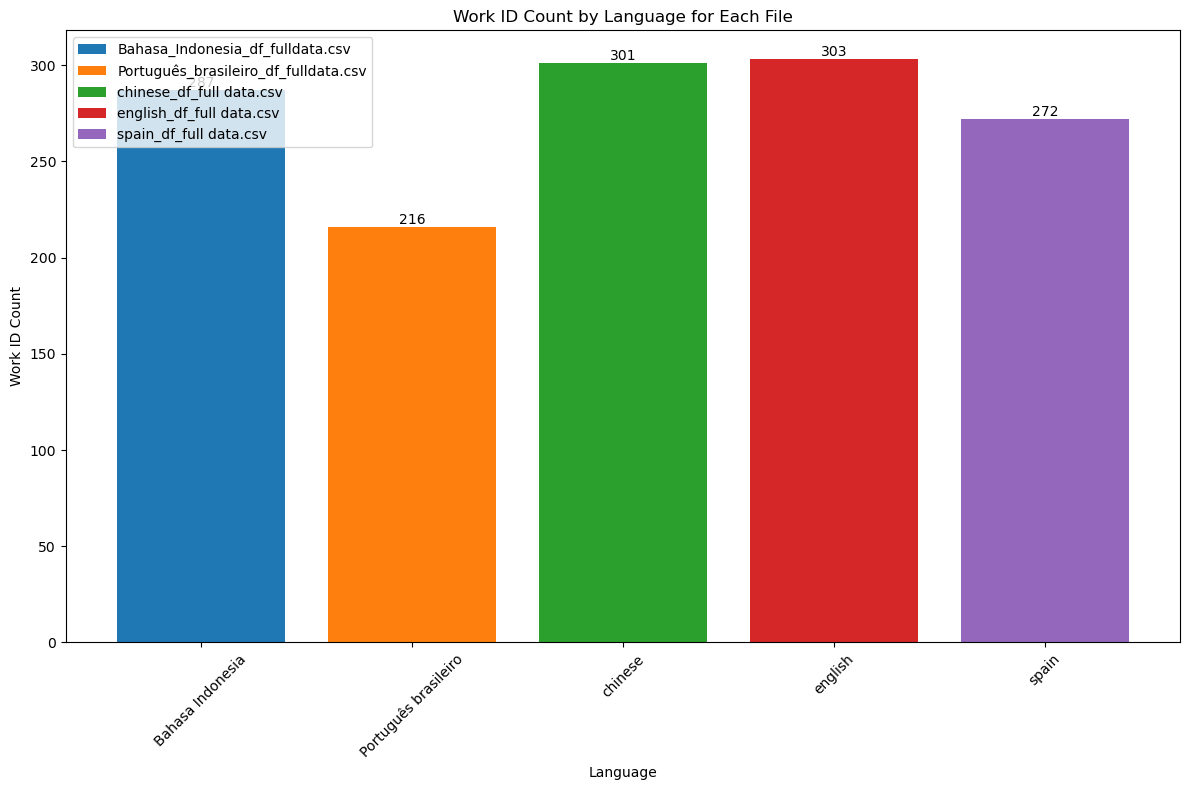

In [76]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def count_language_and_work_ids(file_path):
    df = pd.read_csv(file_path)
    language_counts = df['language'].value_counts()
    return language_counts


directory = '/Users/josiechen/Desktop/full data'
language_counts_dict = {}


for file_name in os.listdir(directory):
    if file_name.endswith('.csv'):
        file_path = os.path.join(directory, file_name)
       
        language_counts = count_language_and_work_ids(file_path)
     
        language_counts_dict[file_name] = language_counts


plt.figure(figsize=(12, 8))


for file_name, language_counts in language_counts_dict.items():
    languages = language_counts.index
    counts = language_counts.values
    plt.bar(languages, counts, label=file_name)

    
    for i in range(len(languages)):
        plt.text(languages[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.xlabel('Language')
plt.ylabel('Work ID Count')
plt.title('Work ID Count by Language for Each File')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Separate the username from the data

In [101]:
import pandas as pd
import ast


df = pd.read_csv('chinese_df_full data.csv')


def safe_literal_eval(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        return []

df['username'] = df['username'].apply(safe_literal_eval)


df_exploded = df.explode('username')


username_storyid_df = df_exploded.groupby('username')['work_id'].apply(list).reset_index()

username_storyid_df.to_csv('username_story_id.csv', index=False)

print("Data has been reorganized and saved to 'username_story_id.csv'")


Data has been reorganized and saved to 'username_story_id.csv'


In [138]:
import pandas as pd
import ast


df = pd.read_csv('Português_brasileiro_df_fulldata.csv')


def safe_literal_eval(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        return []

df['username'] = df['username'].apply(safe_literal_eval)


df_exploded = df.explode('username')


df_exploded.to_csv('prepared data_Português_brasileiro.csv', columns=['username', 'work_id'], index=False)

print("Data has been reorganized and saved to 'prepared data_Português_brasileiro.csv'")


Data has been reorganized and saved to 'prepared data_Português_brasileiro.csv'


In [ ]:
#merge the doc

In [ ]:
import pandas as pd


chinese_df = pd.read_csv("chinese_username_story_id.csv")
english_df = pd.read_csv("english_username_story_id.csv")


merged_df = pd.merge(chinese_df, english_df, on='username', suffixes=('_chinese', '_english'), how='outer')


merged_df['merged_word_id'] = merged_df['work_id_chinese'].fillna('') + ', ' + merged_df['work_id_english'].fillna('')

merged_df.drop(columns=['work_id_chinese', 'work_id_english'], inplace=True)


merged_df.to_csv("merged_username_story_id.csv", index=False)

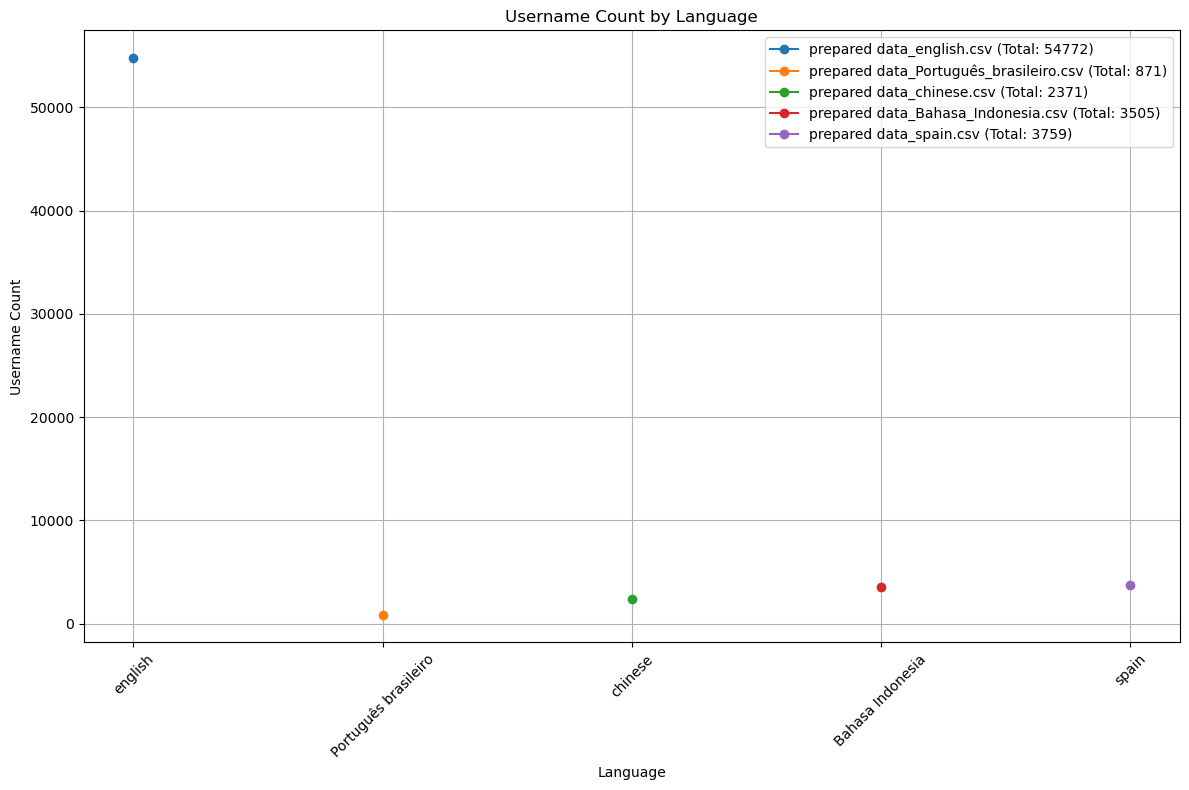

In [85]:
import os
import pandas as pd
import matplotlib.pyplot as plt


def count_language_and_usernames(file_path):
    df = pd.read_csv(file_path)
    language_counts = df['language'].value_counts()
    total_usernames = language_counts.sum()
    return language_counts, total_usernames


directory = '/Users/josiechen/Desktop/prepared data'


language_counts_dict = {}


for file_name in os.listdir(directory):
    if file_name.endswith('.csv'):
        file_path = os.path.join(directory, file_name)
      
        language_counts, total_usernames = count_language_and_usernames(file_path)
   
        language_counts_dict[file_name] = (language_counts, total_usernames)

plt.figure(figsize=(12, 8))


for file_name, (language_counts, total_usernames) in language_counts_dict.items():
    languages = language_counts.index
    counts = language_counts.values
    plt.plot(languages, counts, marker='o', label=f'{file_name} (Total: {total_usernames})')

plt.xlabel('Language')
plt.ylabel('Username Count')
plt.title('Username Count by Language')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
